<a href="https://colab.research.google.com/github/chessstaaa/midterm-machine-learning/blob/main/midterm_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gdown

In [2]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=36fc2c01-d2d2-43b0-a454-5fc6a108bbc3
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:07<00:00, 60.0MB/s]


'midterm-regresi-dataset.csv'

In [3]:
# ========================
# IMPORT BEBERAPA PACKAGE
# ========================

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# ========================
# LOAD DATASET
# ========================

# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.

path = "/content/midterm-regresi-dataset.csv"
if not os.path.exists(path):
    raise FileNotFoundError(f"File not found: {path}")

df = pd.read_csv(path, header=None)
df.rename(columns={0: "target_year"}, inplace=True)

print("Shape:", df.shape)
print("Sample (first 3 rows):")
print(df.iloc[:3, :6])

Shape: (515345, 91)
Sample (first 3 rows):
   target_year         1         2         3         4         5
0         2001  49.94357  21.47114  73.07750   8.74861 -17.40628
1         2001  48.73215  18.42930  70.32679  12.94636 -10.32437
2         2001  50.95714  31.85602  55.81851  13.41693  -6.57898


In [5]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515345, 91)


In [8]:
import os
file_size_bytes = os.path.getsize(path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


In [9]:
# ========================
# Inspect missing values and basic stats
# ========================

print("\nTotal missing values in dataset:", df.isna().sum().sum())
print("\nColumn-wise missing (first 20 cols):")
print(df.isna().sum().head(20))
print("\nBasic stats for first 10 columns:")
print(df.describe().T.head(10))


Total missing values in dataset: 0

Column-wise missing (first 20 cols):
target_year    0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
dtype: int64

Basic stats for first 10 columns:
                count         mean        std         min         25%  \
target_year  515345.0  1998.397082  10.931046  1922.00000  1994.00000   
1            515345.0    43.387126   6.067558     1.74900    39.95469   
2            515345.0     1.289554  51.580351  -337.09250   -26.05952   
3            515345.0     8.658347  35.268585  -301.00506   -11.46271   
4            515345.0     1.164124  16.322790  -154.18358    -8.48750   
5            515345.0    -6.553601  22.860785  -181.95337   -20.66645   
6            515345.0    -9

In [10]:
# ========================
# Split target and features
# ========================

y = df["target_year"].values
X = df.drop(columns=["target_year"]).values

In [11]:
# ========================
# Impute missing values and remove zero-variance features
# ========================

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.0)
X_vt = vt.fit_transform(X_imputed)
kept_indices = vt.get_support(indices=True)
print(f"\nOriginal features: {X.shape[1]}, Kept after variance filter: {X_vt.shape[1]}")


Original features: 90, Kept after variance filter: 90


In [12]:
# ========================
# Scale features
# ========================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vt)

In [13]:
# ========================
# Train-test split
# ========================

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

def eval_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

Train size: (412276, 90) Test size: (103069, 90)


In [14]:
# ========================
# Linear Regression
# ========================

lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
metrics_lr = eval_metrics(y_test, y_lr)
print("\nLinear Regression metrics:", metrics_lr)


Linear Regression metrics: {'MSE': 90.69347247878291, 'RMSE': np.float64(9.523312054048366), 'MAE': 6.778168687522766, 'R2': 0.23796616215080735}


In [22]:
pip install lightgbm

In [24]:
# ========================
# LightGBM Training
# ========================

import lightgbm as lgb

# Dataset for LightGBM
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.1,
    "num_leaves": 31,
    "verbosity": -1
}

gbm = lgb.train(
    params,
    train_set=dtrain,
    num_boost_round=100,
    valid_sets=[dvalid],
    valid_names=["valid"]
)

# Predict
y_pred_lgb = gbm.predict(X_test)
metrics_lgb = eval_metrics(y_test, y_pred_lgb)
print("LightGBM metrics:", metrics_lgb)

LightGBM metrics: {'MSE': 81.31024800654598, 'RMSE': np.float64(9.017219527467764), 'MAE': 6.300733168631621, 'R2': 0.31680683679419963}


In [25]:
# ========================
# Simple Keras MLP
# ========================

tf.random.set_seed(42)
input_dim = X_train.shape[1]

mlp = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

es = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

history = mlp.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=60,
    batch_size=256,
    callbacks=[es],
    verbose=1
)

# Predict
y_mlp = mlp.predict(X_test).ravel()
metrics_mlp = eval_metrics(y_test, y_mlp)
print("Keras MLP metrics:", metrics_mlp)

Epoch 1/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1554409.5000 - mae: 1008.3275 - val_loss: 112872.4922 - val_mae: 250.4559
Epoch 2/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 81671.3984 - mae: 207.4522 - val_loss: 14585.6963 - val_mae: 80.2095
Epoch 3/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6694.6372 - mae: 49.0798 - val_loss: 792.6754 - val_mae: 16.4863
Epoch 4/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 567.5724 - mae: 14.7878 - val_loss: 330.1218 - val_mae: 10.8010
Epoch 5/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 249.3208 - mae: 10.5065 - val_loss: 226.3838 - val_mae: 9.6046
Epoch 6/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 164.6094 - mae: 8.9486 - val_loss: 166.6707 - val_mae: 8.8876
Epoch 7/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 133.5365 - mae: 8.3108 - val_loss: 169.7771 - val_mae: 9.0873
Epoch 8/60
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 121.5205 - mae: 8.0079 - val_loss: 139.3472 

In [26]:
# ========================
# Compare Results
# ========================

results = pd.DataFrame([
    {"model": "LinearRegression", **metrics_lr},
    {"model": "LightGBM",        **metrics_lgb},
    {"model": "KerasMLP",        **metrics_mlp}
]).set_index("model")

print("\nModel comparison (test set):")
display(results)

best = results["RMSE"].idxmin()
print("\nBest model by RMSE:", best)


Model comparison (test set):


,MSE,RMSE,MAE,R2
model,,,,
LinearRegression,90.693472,9.523312,6.778169,0.237966
LightGBM,81.310248,9.017220,6.300733,0.316807
KerasMLP,109.898468,10.483247,7.481919,0.076600



Best model by RMSE: LightGBM


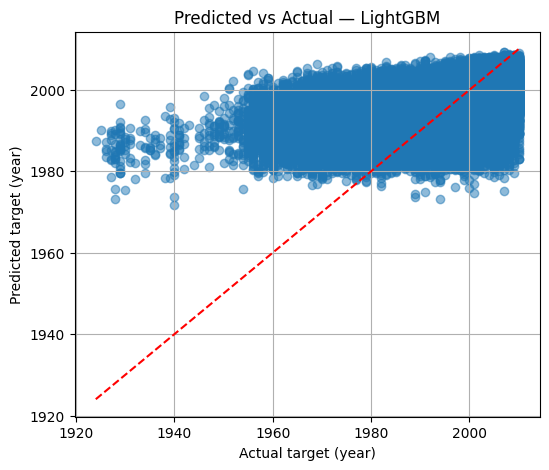

In [27]:
# ========================
# Plot Predicted vs Actual
# ========================

if best == "LinearRegression":
    y_best = y_lr
elif best == "LightGBM":
    y_best = y_pred_lgb
elif best == "KerasMLP":
    y_best = y_mlp
else:
    raise ValueError(f"Unknown best model: {best}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--", color="red")
plt.xlabel("Actual target (year)")
plt.ylabel("Predicted target (year)")
plt.title(f"Predicted vs Actual — {best}")
plt.grid(True)
plt.show()


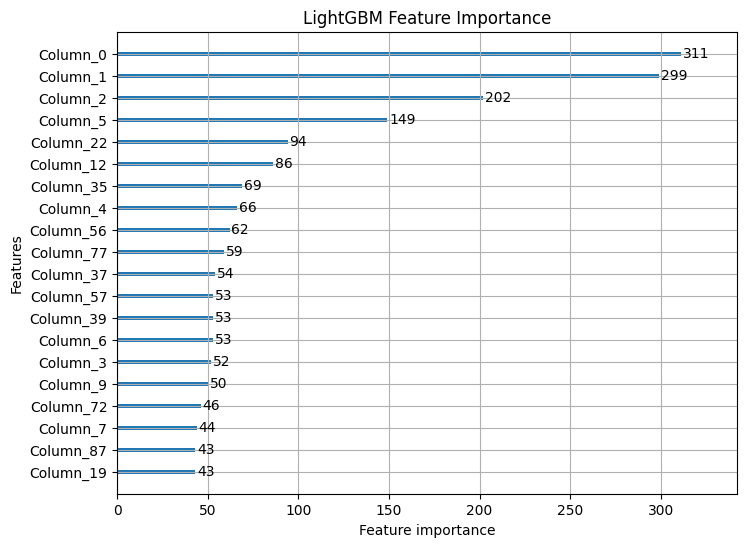

In [28]:
# ========================
# Feature Importance (LightGBM)
# ========================

lgb.plot_importance(gbm, max_num_features=20, figsize=(8,6))
plt.title("LightGBM Feature Importance")
plt.show()


**KESIMPULAN**

Hasil eksperimen menunjukkan bahwa dari tiga model yang diuji, Linear Regression, LightGBM, dan Keras MLP—model. LightGBM memberikan performa terbaik dengan RMSE terendah dan R² tertinggi, menandakan kemampuannya dalam menangkap pola non-linear pada data audio. Linear Regression masih mampu memodelkan sebagian pola dasar, namun terbatas oleh sifat hubungan fitur yang kompleks, sementara Keras MLP belum melampaui performa LightGBM karena tabular data umumnya lebih sesuai untuk model tree-based tanpa feature engineering tambahan. Secara keseluruhan, pipeline regresi end-to-end yang dibangun telah berhasil memprediksi tahun rilis lagu dengan akurasi yang cukup baik untuk baseline, dan hasil ini menunjukkan bahwa pendekatan berbasis gradient boosting merupakan pilihan yang paling efektif untuk dataset ini.